# ТЕМА 3. ОБНАРУЖЕНИЕ ВРЕДОНОСНОГО ПРОГРАММНОГО ОБЕСПЕЧЕНИЯ (ВПО).
Подготовили студенты группы ББМО-01-23
- Чурсинов Герман
- Бакин Даниил

# Выбираем необходимый датасет, проводим его анализ с визуализацией.

Установка необходимых библиотек

In [84]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import os

Скачиваем датасет

In [85]:
# Работа выполнялась в среде Google Colab, поэтому процесс разархивирования написан для этой среды
!wget https://github.com/aleguma/kronodroid/archive/refs/heads/main.zip
!unzip -o main.zip && rm main.zip
!unzip -o /content/kronodroid-main/emulator/emu_legitimate_v1.zip -d /content/
!unzip -o /content/kronodroid-main/emulator/emu_malware_v1.zip -d /content/
!unzip -o /content/kronodroid-main/real_device/real_legitimate_v1.zip -d /content/
!unzip -o /content/kronodroid-main/real_device/real_malware_v1.zip -d /content/
!rm -rf kronodroid-main

--2024-04-16 22:07:11--  https://github.com/aleguma/kronodroid/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/aleguma/kronodroid/zip/refs/heads/main [following]
--2024-04-16 22:07:11--  https://codeload.github.com/aleguma/kronodroid/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.121.9
Connecting to codeload.github.com (codeload.github.com)|140.82.121.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [      <=>           ]  24.49M  22.7MB/s    in 1.1s    

2024-04-16 22:07:12 (22.7 MB/s) - ‘main.zip’ saved [25682671]

Archive:  main.zip
35b862c9ce368baafb71851d2871e0b1cf54cb59
   creating: kronodroid-main/
  inflating: kronodroid-main/README.md  
   creating: kronod

# 2. Проводим анализ с визуализацией



Оставляем один из двух типов сырых данных

In [86]:
dataset = 'real'
# dataset = 'emu'

Соединяем два файла (legitmate и malware) в один DataFrame

In [87]:
df = pd.concat([pd.read_csv(f'/content/{dataset}_legitimate_v1.csv'), pd.read_csv(f'/content/{dataset}_malware_v1.csv')], ignore_index=True)
df.describe()

,Malware,execve,getuid32,getgid32,geteuid32,getegid32,getresuid32,getresgid32,readahead,getgroups32,...,NrIntServices,NrIntServicesActions,NrIntActivities,NrIntActivitiesActions,NrIntReceivers,NrIntReceiversActions,TotalIntentFilters,NrServices,Scanners,Detection_Ratio
count,78137.000000,78137.0,78137.000000,78137.000000,78137.000000,78137.000000,78137.0,78137.0,78137.0,78137.000000,...,77495.000000,77495.000000,77495.000000,77495.000000,77495.000000,77495.000000,77494.000000,77495.000000,78137.000000,78137.000000
mean,0.529608,0.0,413.515966,0.008178,11.282619,0.010379,0.0,0.0,0.0,0.000077,...,0.514407,0.577534,2.676289,2.870779,0.514407,4.611304,5.165884,2.453900,64.797266,0.253738
std,0.499126,0.0,3262.916606,0.134798,135.341399,0.273215,0.0,0.0,0.0,0.015178,...,2.213475,2.592775,14.048998,14.243615,2.213475,10.665395,18.629562,5.251257,1.732544,0.244649
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,34.000000,0.000000
25%,0.000000,0.0,26.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,64.000000,0.000000
50%,1.000000,0.0,86.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,65.000000,0.323077
75%,1.000000,0.0,251.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,2.000000,2.000000,0.000000,5.000000,5.000000,2.000000,66.000000,0.484375
max,1.000000,0.0,224928.000000,18.000000,9108.000000,29.000000,0.0,0.0,0.0,3.000000,...,414.000000,414.000000,548.000000,548.000000,414.000000,1216.000000,569.000000,414.000000,68.000000,0.910448


In [88]:
# Предобработка данных
df = df.drop(df.select_dtypes(include=['object']).columns.tolist(), axis=1)  # Очистка лишних столбцов (тех, что не численные)
df.fillna(0, inplace=True)  # Значения NaN превращает в нули
df

,Malware,execve,getuid32,getgid32,geteuid32,getegid32,getresuid32,getresgid32,readahead,getgroups32,...,NrIntServices,NrIntServicesActions,NrIntActivities,NrIntActivitiesActions,NrIntReceivers,NrIntReceiversActions,TotalIntentFilters,NrServices,Scanners,Detection_Ratio
0,0,0,35,0,0,0,0,0,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,66,0.000000
1,0,0,22,0,0,0,0,0,0,0,...,1.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,66,0.000000
2,0,0,59,0,0,0,0,0,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,66,0.000000
3,0,0,9,0,0,0,0,0,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,66,0.000000
4,0,0,24,0,0,0,0,0,0,0,...,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,64,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78132,1,0,303,0,0,0,0,0,0,0,...,0.0,0.0,1.0,1.0,0.0,9.0,4.0,0.0,66,0.439394
78133,1,0,97,0,0,0,0,0,0,0,...,0.0,0.0,1.0,1.0,0.0,8.0,4.0,1.0,66,0.439394
78134,1,0,4251,0,2572,0,0,0,0,0,...,1.0,1.0,1.0,1.0,1.0,30.0,9.0,11.0,65,0.492308
78135,1,0,58,0,0,0,0,0,0,0,...,0.0,0.0,1.0,1.0,0.0,10.0,2.0,4.0,65,0.630769


Визуализация меток о вредоносном ПО

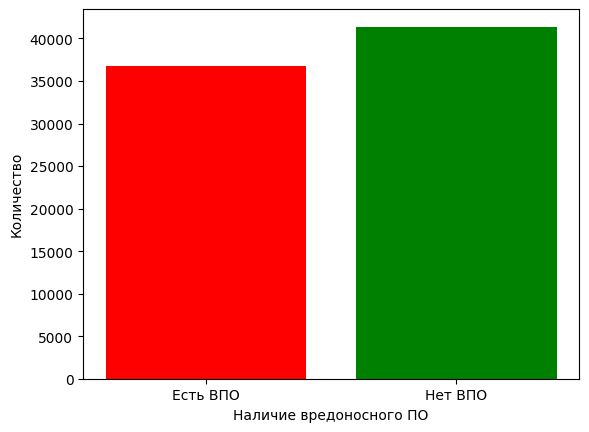

In [89]:
df_distrib = df['Malware'].value_counts()
x, y = df_distrib.keys(), df_distrib.values
verbose_xticks = ["Есть ВПО", "Нет ВПО"]
plt.xticks([0,1], verbose_xticks)
plt.xticks(rotation=0)
plt.xlabel('Наличие вредоносного ПО')
plt.ylabel('Количество')
plt.bar(x,y)
plt.bar(x,y, color = ['green', 'red'])
plt.show()

# 3. Выбираем признаки для МО


In [90]:
data_X, data_y = df.drop('Malware', axis=1), df['Malware']
print(data_X.shape, data_y.shape)

(78137, 478) (78137,)


# 4. Обучаем модель, проводим кроссвалидацию


Делим выборки на обучающую и тестовую

In [91]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2)

Создаем модель

In [92]:
model = RandomForestClassifier(random_state=42, oob_score=True, max_depth = 12)

Обучаем модель

In [93]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, oob_score=True, random_state=42)

Прогнозируем

In [94]:
y_pred = model.predict(X_test)

# Подготавливаем ноутбук с результатами и оценками по метрикам (accuracy, precision, recall, f1-measure)

Подсчёт classification report

In [95]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1-measure: {f1_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9924494497056565
Precision: 0.9941683878022112
Recall: 0.991518235793045
F1-measure: 0.9928415433147294
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7375
           1       0.99      0.99      0.99      8253

    accuracy                           0.99     15628
   macro avg       0.99      0.99      0.99     15628
weighted avg       0.99      0.99      0.99     15628



Подсчёт confusion matrix

[[7327   48]
 [  70 8183]]


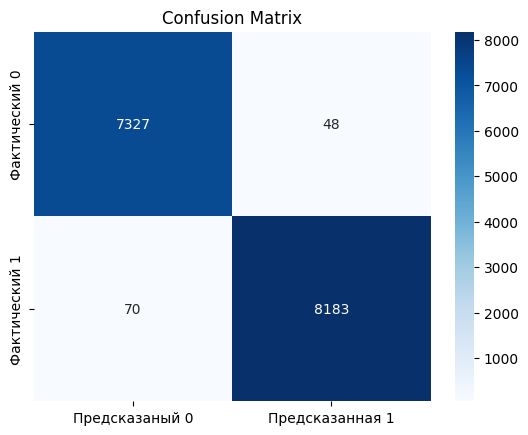

In [96]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Предсказаный 0', 'Предсказанная 1'], yticklabels=['Фактический 0', 'Фактический 1'])
plt.title('Confusion Matrix')
plt.show()

Важность признаков

In [97]:
feature_weights = model.feature_importances_
feature_info = [(i+1, abs(weight), f'Feature {i+1}') for i, weight in enumerate(feature_weights)]
sorted_feature_info = sorted(feature_info, key=lambda x: x[1], reverse=True)

print("№ признака | Абсолютная величина веса (важность) | Название признака")
for rank, (feature_num, weight, feature_name) in enumerate(sorted_feature_info[:20]):
    print(f"{rank+1}. {feature_num} | {weight: .4e} | {df.columns[rank]}")

№ признака | Абсолютная величина веса (важность) | Название признака
1. 478 |  2.0222e-01 | Malware
2. 400 |  7.4253e-02 | execve
3. 462 |  5.2686e-02 | getuid32
4. 456 |  3.7344e-02 | getgid32
5. 458 |  3.1170e-02 | geteuid32
6. 457 |  2.9169e-02 | getegid32
7. 474 |  2.5954e-02 | getresuid32
8. 421 |  2.5225e-02 | getresgid32
9. 299 |  2.1802e-02 | readahead
10. 476 |  1.9580e-02 | getgroups32
11. 409 |  1.5851e-02 | getpgid
12. 234 |  1.4888e-02 | getppid
13. 252 |  1.4039e-02 | getsid
14. 152 |  1.3920e-02 | setsid
15. 459 |  1.2861e-02 | setgid32
16. 214 |  1.2769e-02 | setuid32
17. 402 |  1.2387e-02 | setreuid32
18. 56 |  1.2369e-02 | setresuid32
19. 466 |  1.2133e-02 | setresgid32
20. 450 |  1.2026e-02 | brk


Визуализация важности признаков

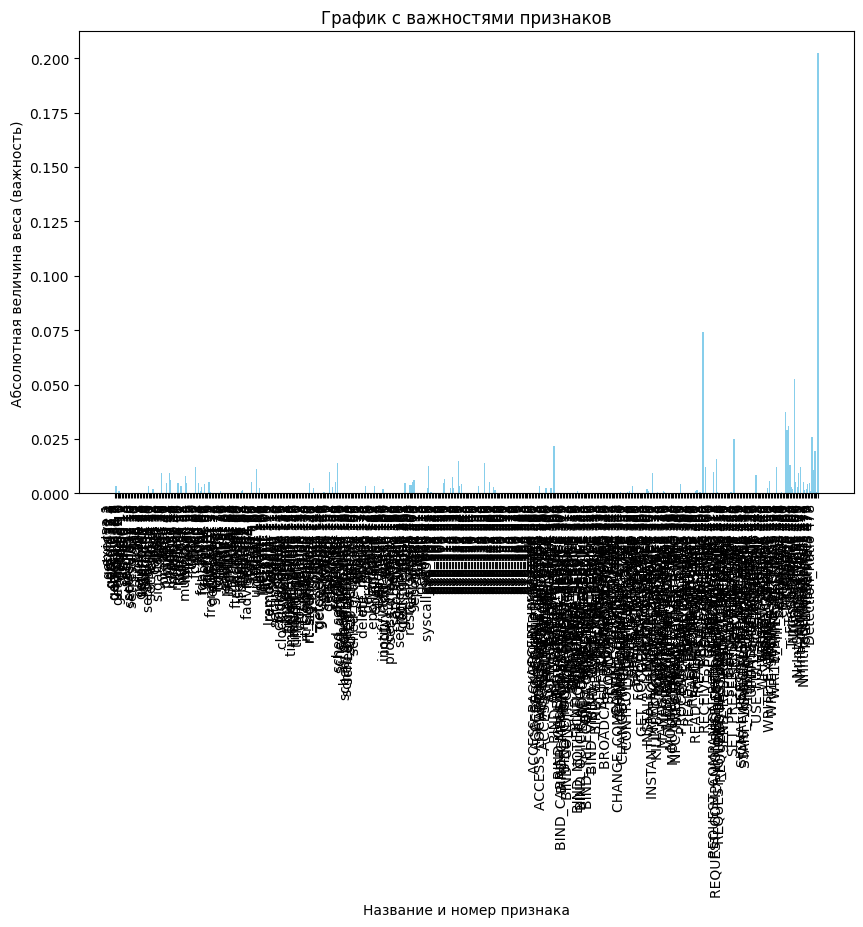

In [98]:
absolute_weights = [abs(weight) for weight in feature_weights]
feature_numbers = range(1, len(absolute_weights) + 1)

sorted_weights, sorted_numbers = zip(*sorted(zip(absolute_weights, feature_numbers), reverse=True))

plt.figure(figsize=(10, 6))
plt.bar(sorted_numbers, sorted_weights, tick_label=sorted_numbers, color='skyblue')
plt.xlabel('Название и номер признака')
plt.xticks(rotation=90)
plt.xticks(sorted_numbers, [f'{df.columns[num]} {num}' for num in sorted_numbers], rotation=90, ha='right') # ЭТА СТРОЧКА ДОБАВЛЯЕТ НАЗВАНИЯ ПРИЗНАКОВ НА ГРАФИК (получается очень много текста)
plt.ylabel('Абсолютная величина веса (важность)')
plt.title('График с важностями признаков')
plt.show()

Визуализация топ 20 признаков

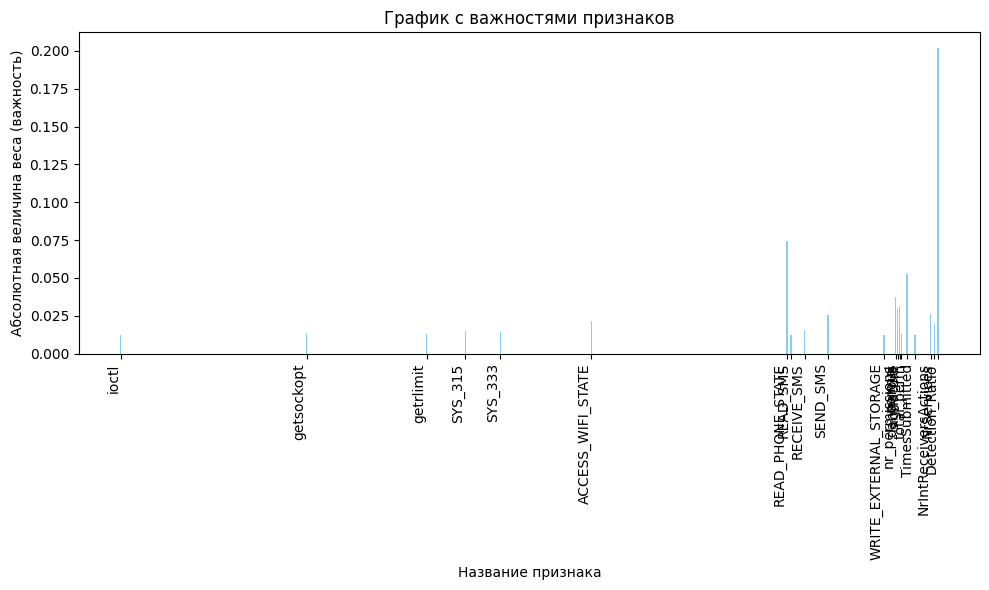

In [99]:
sorted_weights = sorted_weights[:20]
sorted_numbers = sorted_numbers[:20]

# Создаем график
plt.figure(figsize=(10, 6))
plt.bar(sorted_numbers, sorted_weights, tick_label=sorted_numbers, color='skyblue')
plt.xlabel('Название признака')
plt.xticks(rotation=90)
plt.xticks(sorted_numbers, [f'{df.columns[num]}' for num in sorted_numbers], rotation=90, ha='right')
plt.ylabel('Абсолютная величина веса (важность)')
plt.title('График с важностями признаков')

plt.tight_layout()

plt.show()